In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models
from keras import layers

# 원본 모델
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

# 작은 용량의 모델
model2 = models.Sequential()
model2.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(6, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

# 큰 용량의 모델
model3 = models.Sequential()
model3.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
model3.add(layers.Dense(1024, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1


2022-03-17 18:47:17.415455: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-17 18:47:17.415551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
model1.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

model2.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

model3.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history1 = model1.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      verbose=0,
                      validation_data=(x_val, y_val))

history2 = model2.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      verbose=0,
                      validation_data=(x_val, y_val))

history3 = model3.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      verbose=0,
                      validation_data=(x_val, y_val))

2022-03-17 18:47:17.888752: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-17 18:47:18.160976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-17 18:47:18.892495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-17 18:47:26.106383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-17 18:47:26.789910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-17 18:47:33.880344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-03-17 18:47:35.864530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113

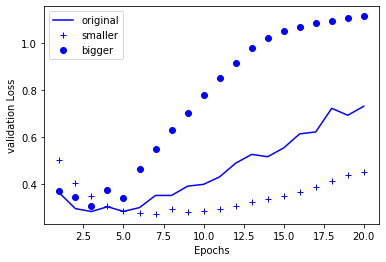

In [13]:
import matplotlib.pyplot as plt

history_dict1 = history1.history
val_loss1 = history_dict1['val_loss']

history_dict2 = history2.history
val_loss2 = history_dict2['val_loss']

history_dict3 = history3.history
val_loss3 = history_dict3['val_loss']

epochs = range(1, len(val_loss1)+1)

plt.plot(epochs, val_loss1, 'b', label='original')
plt.plot(epochs, val_loss2, 'b+', label='smaller')
plt.plot(epochs, val_loss3, 'bo', label='bigger')
plt.xlabel('Epochs')
plt.ylabel('validation Loss')
plt.legend()

plt.show()

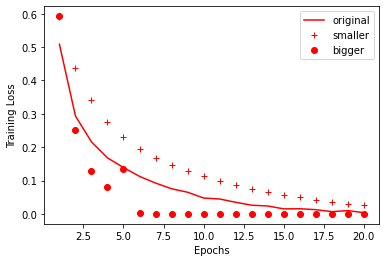

In [14]:
history_dict1 = history1.history
loss1 = history_dict1['loss']

history_dict2 = history2.history
loss2 = history_dict2['loss']

history_dict3 = history3.history
loss3 = history_dict3['loss']

plt.plot(epochs, loss1, 'r', label='original')
plt.plot(epochs, loss2, 'r+', label='smaller')
plt.plot(epochs, loss3, 'ro', label='bigger')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()

plt.show()